In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 10)

## Initialisation des variables

$$f(x)=\frac{1}{4\pi}\exp \left \{ -\frac{1}{2} \left (x-\begin{pmatrix}2\\ 2\end{pmatrix} \right)^T\begin{bmatrix}2 & 0\\ 0 & 2\end{bmatrix}^{-1}\left (x-\begin{pmatrix}2\\ 2\end{pmatrix} \right ) \right \}$$
$$f(x)=\frac{1}{12\pi}\exp\left \{ -\frac{1}{2}\left(x-\begin{pmatrix}-4\\ -4\end{pmatrix} \right)^T\begin{bmatrix}6 & 0\\ 0 & 6\end{bmatrix}^{-1}\left (x-\begin{pmatrix}-4\\ -4\end{pmatrix}\right ) \right \}$$

<function matplotlib.pyplot.legend(*args, **kwargs)>

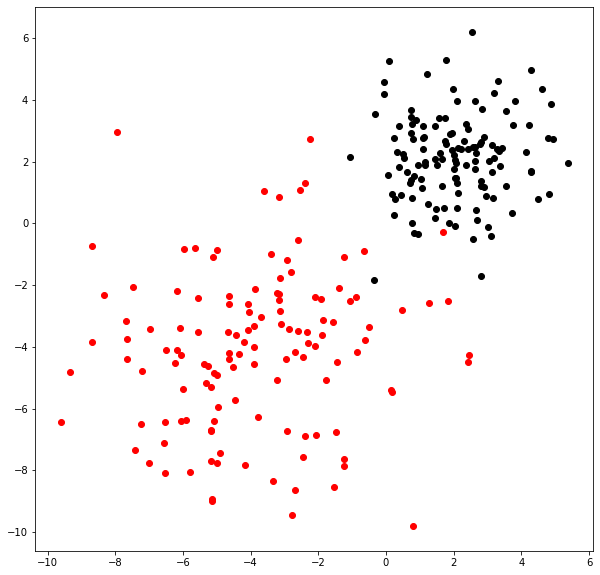

In [3]:
# Simulation de n = 256 données X=(X1, X2) suivant une loi normale bidimensionnelle
# de moyenne (0,0), de la variance Var(X1) = 1, Var(X2) = 1 et la covariance Cov(X1, X2) = 0.5


mean_1 = np.array([2, 2])
mean_2 = np.array([-4, -4])

cov_1 = np.array([[2, 0], [0, 2]])
cov_2 = np.array([[6, 0], [0, 6]])

X1 = (np.random.multivariate_normal(mean_1, cov_1, 128))
X2 = (np.random.multivariate_normal(mean_2, cov_2, 128))


# Affichage des données

plt.plot(X1[:, 0], X1[:,1], "o", label = 'Individu', color = "black")
plt.plot(X2[:, 0], X2[:,1], "o", label = 'Individu', color = "red")

plt.legend


## Clustering avec K-Means

- n_init : Nombre de fois que l'algorithme k-means sera lancé, le meilleur résultat sera ensuite retourné.

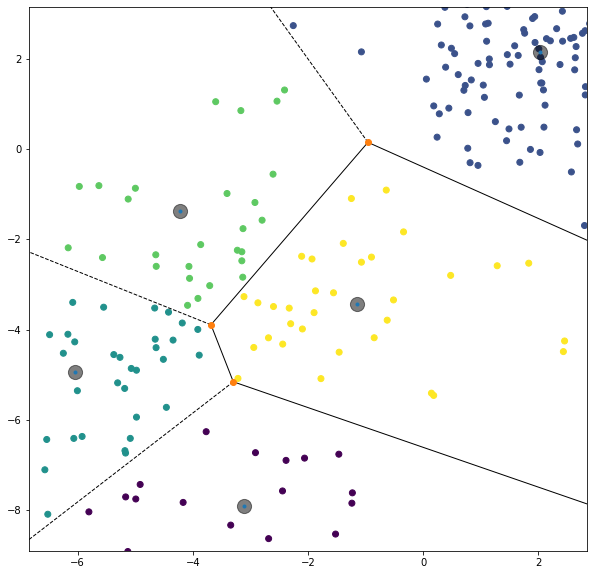

Taux d'erreur : 1.0


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from scipy.spatial import Voronoi, voronoi_plot_2d

clusters = 5

kmeans = KMeans(n_clusters=clusters, n_init=1, init='k-means++')

data = np.concatenate((X1, X2), axis=0)
kmeans.fit(data)

y_kmeans = kmeans.predict(data)

centers = kmeans.cluster_centers_

if clusters > 2:
    bounds = Voronoi(centers)
    voronoi_plot_2d(bounds)

plt.scatter(data[:, 0], data[:, 1], c=y_kmeans)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()
print('Taux d\'erreur : ' + str(adjusted_rand_score(kmeans.labels_, y_kmeans)))


## Choix du bon cluster en utilisant les silhouettes

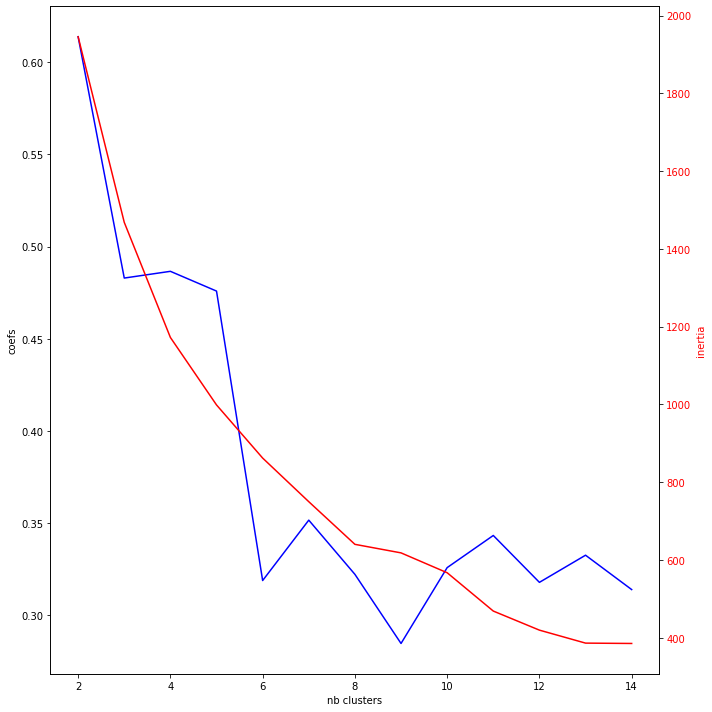

In [5]:
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_inertia(data_kmeans):
    clusters_max = 15
    s_coefs = []
    s_intertia = []
    for i in range(2, clusters_max) :
        kmeans = KMeans(n_clusters=i, n_init=1, init='k-means++').fit(data_kmeans)
        labels = kmeans.labels_

        s_avg = silhouette_score(data_kmeans, labels)
        # print(str(i) + " clusters, coef de silhouette : " + str(s_avg) + ", intertie : " + str(kmeans.inertia_))
        s_coefs.append(s_avg)
        s_intertia.append(kmeans.inertia_)
        # s_sample = silhouette_samples(data, labels)

    fig, ax1 = plt.subplots()
    ax1.set_xlabel("nb clusters")
    ax1.set_ylabel("coefs")
    ax1.plot(range(2, clusters_max), s_coefs, color="blue")
    ax2 = ax1.twinx()
    ax2.set_ylabel("inertia", color="red")
    ax2.plot(range(2, clusters_max), s_intertia, color="red")
    ax2.tick_params(axis='y', labelcolor="red")
    fig.tight_layout()
    plt.show()

plot_inertia(data)

## Clustering Ascendant Hiérarchique (CAH)

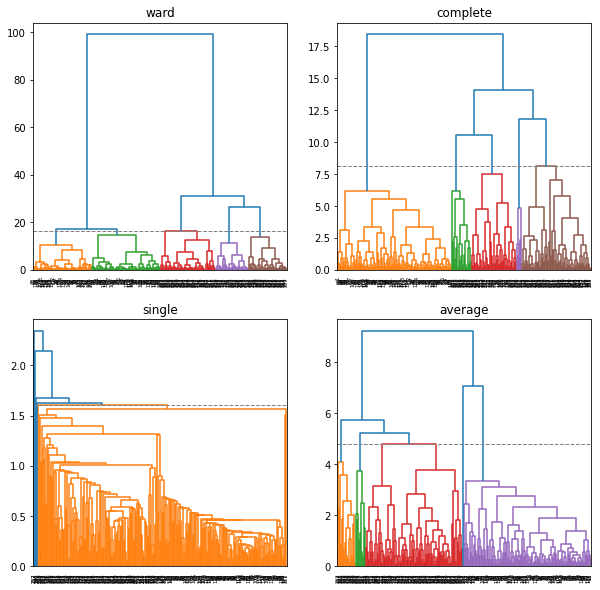

In [6]:
from scipy.cluster.hierarchy import linkage as CAH, dendrogram, fcluster

def compute_z_complete(method):
    plt.gca().set_title(method)
    Z_complete = CAH(data, method=method, metric='euclidean')

    threshold_value = Z_complete[Z_complete.shape[0] - clusters, 2]

    plt.axhline(y=threshold_value, c='grey', lw=1, linestyle='dashed')
    threshold_value_before = Z_complete[Z_complete.shape[0] - clusters + 1, 2]
    dendrogram(Z_complete,  color_threshold=threshold_value_before)
"""
plt.title("CAH")

plt.subplot(2, 2, 1)
compute_z_complete('ward')

plt.subplot(2, 2, 2)
compute_z_complete('complete')

plt.subplot(2, 2, 3)
compute_z_complete('single')

plt.subplot(2, 2, 4)
compute_z_complete('average')
"""
# plt.subplot(1, 2, 2)
# cah_groups = fcluster(Z_complete, t=threshold_value, criterion='distance')
# plt.scatter(data[:, 0], data[:, 1], c=cah_groups)

## Utilisation de la m ́ethode K-Means pour la r ́eduction de couleur


In [1]:
import matplotlib.image as mpimg

K = 5
kmeans = KMeans(n_clusters=K,n_init=5,init='k-means++')
img = np.float32(mpimg.imread('Rubiks_cube_L.png'))
# img = np.float32(mpimg.imread('img.png'))
a = np.reshape(img, (img.shape[0]*img.shape[1],3))
kmeans.fit(a)

for i in range(a.shape[0]):
    b = kmeans.cluster_centers_[kmeans.labels_[i],:]
    a[i] = b



row = [row[0] for row in a]
c = np.reshape(row, (img.shape[0], img.shape[1]))
plt.imshow(c/255)

NameError: name 'KMeans' is not defined

## Clustering de données de températures 

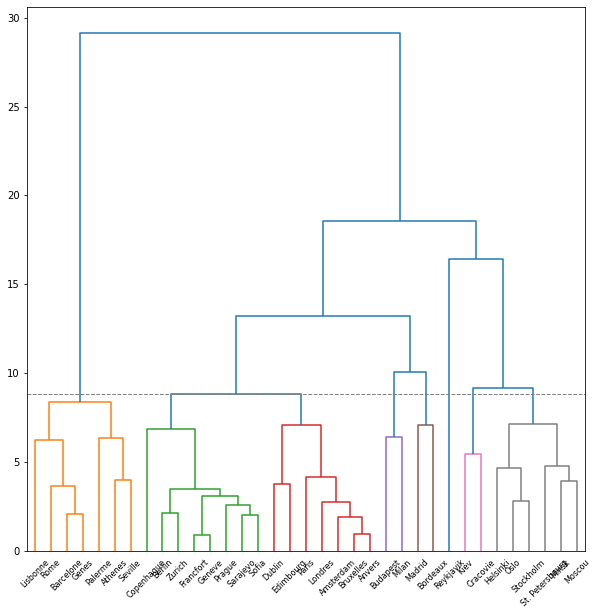

In [9]:
import pandas as pd

clusters = 7

data_temperature = pd.read_csv("temperatures.csv",sep=";",decimal=".",header=0,index_col = 0)
n=len(data_temperature)

data = data_temperature.drop(columns=['Region', 'Moyenne', 'Amplitude', 'Latitude', 'Longitude'])

Z_complete = CAH(data, method='average', metric='euclidean')

threshold_value = Z_complete[Z_complete.shape[0] - clusters, 2]

plt.axhline(y=threshold_value, c='grey', lw=1, linestyle='dashed')


city_name = list(data.index)

a = dendrogram(Z_complete, labels=city_name, color_threshold=threshold_value)


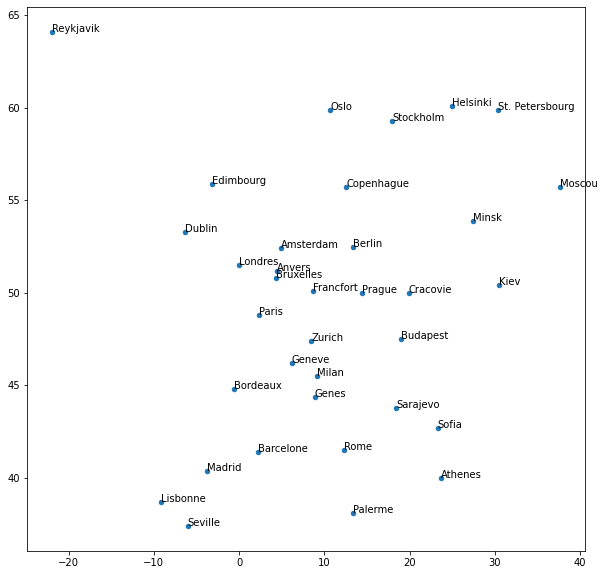

In [10]:
Coord = data_temperature.loc[:, ['Latitude', 'Longitude']].values

#Cette ligne permet d’extraire les coordonn ́ees
plt.scatter(Coord[:, 1], Coord[:, 0], s=20, cmap='viridis')

#On place les points
for i, txt in enumerate(city_name):
    plt.annotate(txt, (Coord[i, 1], Coord[i, 0])) #On place le nom des villes

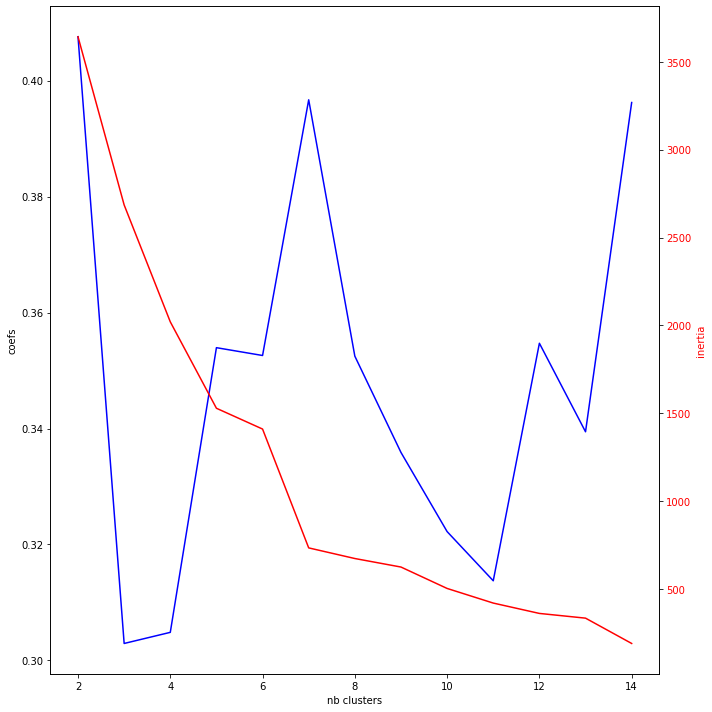

In [11]:
plot_inertia(Coord)

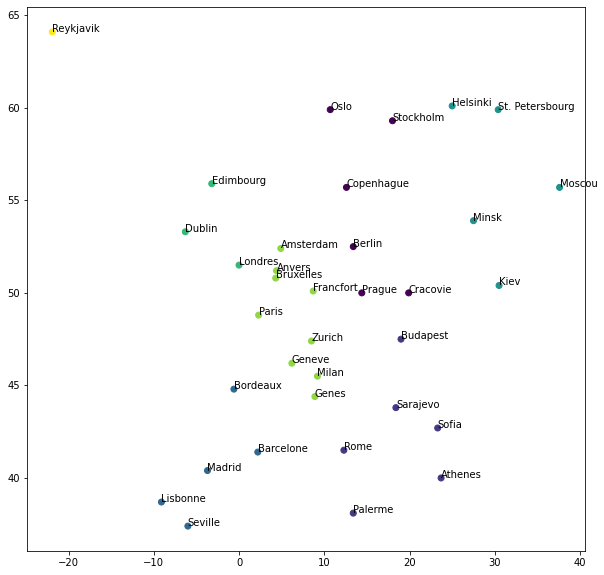

In [12]:
nb_clusters_cities = 7

kmeans = KMeans(n_clusters=nb_clusters_cities, n_init=10, init='k-means++').fit(Coord)
y_kmeans = kmeans.predict(Coord)

plt.scatter(Coord[:, 1], Coord[:, 0], c=y_kmeans)

for i, txt in enumerate(city_name):
    plt.annotate(txt, (Coord[i, 1], Coord[i, 0])) #On place le nom des villes